In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from torch import distributions as D
import utils_analysis as uta

In [2]:
def generate_data(dimension, number_gaussians, amount, asymmetric=False, skewed=False):
    
    if asymmetric:
        mix = D.Categorical(torch.rand(number_gaussians,))
    else:
        mix = D.Categorical(torch.ones(number_gaussians,))

    if skewed:
        comp = D.Independent(D.Normal(torch.randn(number_gaussians, dimension), torch.rand(number_gaussians, dimension)), 1)
    else:
        comp = D.Independent(D.Normal(torch.randn(number_gaussians, dimension), torch.ones(number_gaussians, dimension)), 1)
        
    gmm = D.MixtureSameFamily(mix, comp)
    
    samples = gmm.sample([amount])
    samples_np = samples.numpy()
    
    return samples_np

In [57]:
bounds = np.array([-12, 12, -12, 12])
number_gaussians = 4
dimension = 50
amount = 50000

In [58]:
train_np = generate_data(dimension, number_gaussians, amount)
"""
total = 50000
train_np_1_base = generate_data(50, 1, total)
train_np_2_base = generate_data(50, 1, total)
"""

In [144]:
"""
percent = 50
ratio = percent/100

train_np_1 = train_np_1_base[:int(ratio*total)]
train_np_2 = train_np_2_base[:int((1-ratio)*total)]

train_np = uta.shuffler(np.vstack((train_np_1, train_np_2)))
"""
pca = PCA(n_components=2)
trainingpca = pca.fit_transform(train_np)

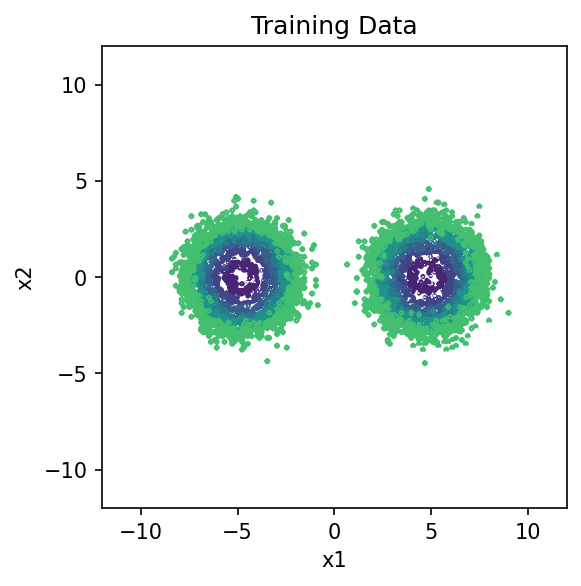

In [145]:
def FE_hist(data, bounds, binw=0.1, binner=None):

    if binner is None:
        binner = (np.arange(bounds[0], bounds[1] + binw, binw),
                    np.arange(bounds[2], bounds[3] + binw, binw))

    counts, xedges, yedges = np.histogram2d(data[:,0], data[:,1],
                                           bins=binner, density=True)
    prob = counts + 1e-3
    G = -np.log(prob)
    G[G == np.inf] = -1
    G[G == -1] = max(G.ravel())
    G -= min(G.ravel())
    return G, xedges, yedges

G_MD, xe_MD, ye_MD = FE_hist(trainingpca, bounds, binw=0.1)

fig = plt.figure(figsize=(4,4), dpi=150)
axs = plt.axes()
axs.contour(G_MD.T, extent=[xe_MD[0], xe_MD[-1], ye_MD[0], ye_MD[-1]],
        linewidths=2, vmin = 0, vmax = 6)
axs.set_xlabel("x1")
axs.set_ylabel("x2")
axs.set_title("Training Data")
axs.set_xlim(bounds[0], bounds[1]);
axs.set_ylim(bounds[2], bounds[3]);

In [146]:
train_np.shape

(50000, 50)

In [147]:
save_destination = f"data_input/dim_{dimension}_modes_{number_gaussians}"
print(save_destination)

In [148]:
"""
save_destination = f"data_input/dim_{dimension}_modes_2_{percent}"
print(save_destination)
"""

data_input/dim_50_modes_2_50


In [149]:
np.save(save_destination, train_np)